In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [2]:
def graph(ds, in_year, plot, title):
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    Z = ds['MI'].sel(year=in_year).squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)
    if plot == axs[0,0]:
        cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05)
        cbar.set_label('metabolic index',fontsize=12)
    
    # Zoom in on a region
    # ax.set_extent([120,180,-30,30])

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title+str(in_year),fontsize=14,loc='center')

In [3]:
# z0 (k01) ensemble average
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)
ds_z0avgMean = ds_z0avg.groupby('time.year').mean(dim='time')
ds_z0avgMin = ds_z0avg.groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [4]:
# z0 (k01) ensemble minimum
z0minpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensMin_1950_2100.nc'
ds_z0min = xr.open_dataset(z0minpath)
ds_z0minMean = ds_z0min.groupby('time.year').mean(dim='time')
ds_z0minMin = ds_z0min.groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


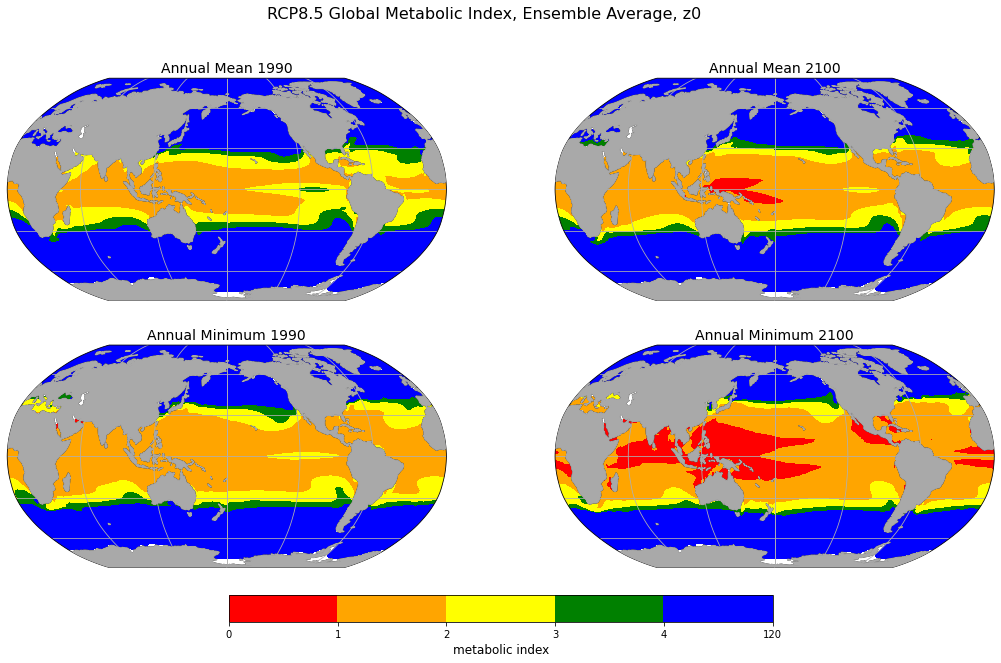

In [111]:
# map of z0 (k01) ensemble average
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Average, z0', fontsize=16) # Specify a figure title
graph(ds_z0avgMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_z0avgMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_z0avgMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_z0avgMin, 2100, axs[1,1], 'Annual Minimum ')

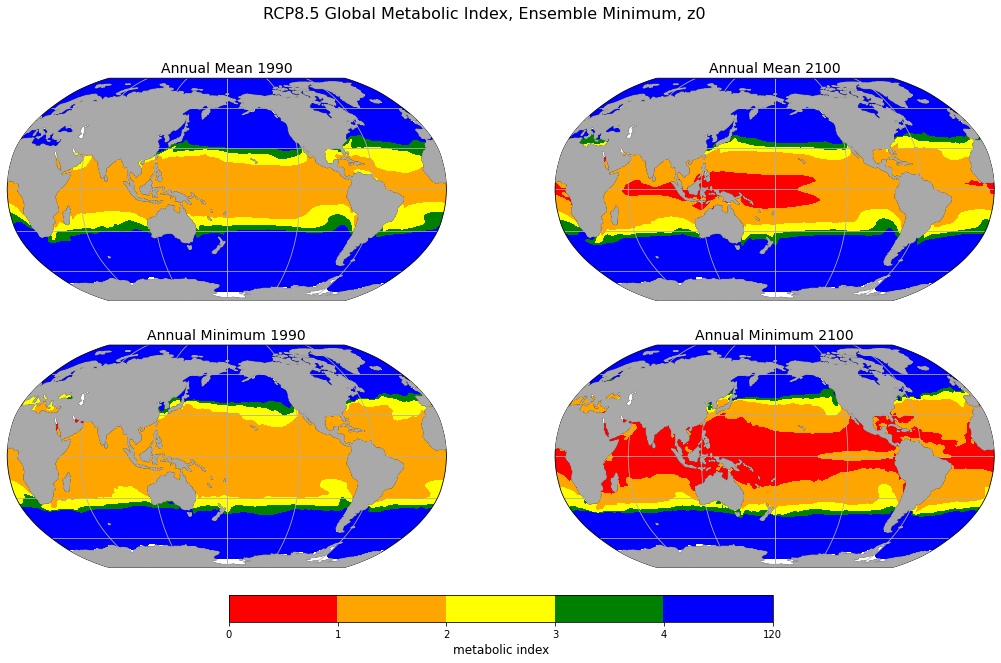

In [112]:
# map of z0 (k01) ensemble minimum
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Minimum, z0', fontsize=16) # Specify a figure title
graph(ds_z0minMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_z0minMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_z0minMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_z0minMin, 2100, axs[1,1], 'Annual Minimum ')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


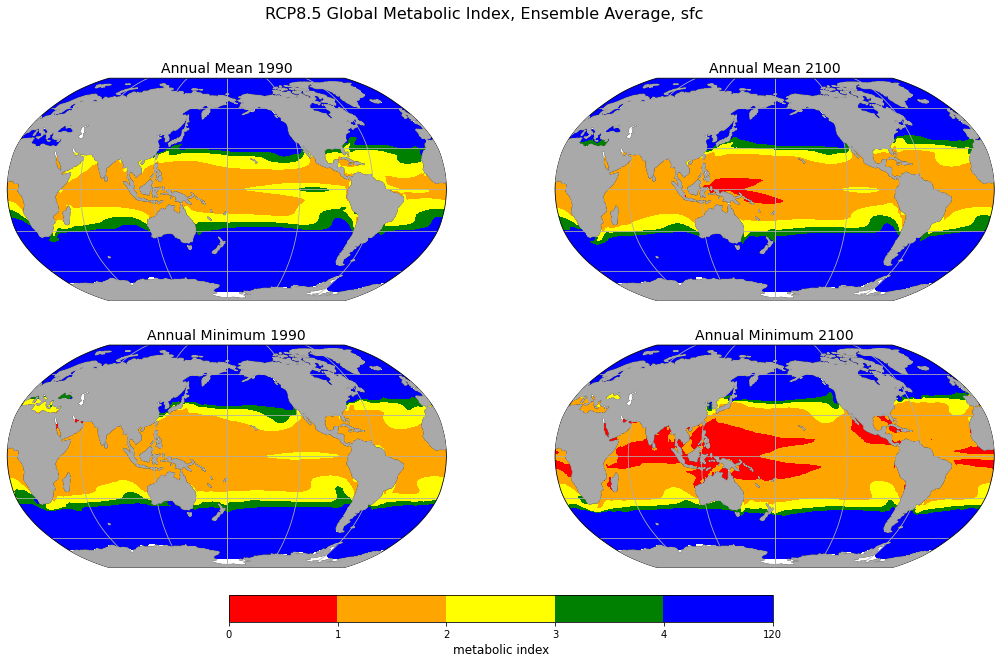

In [123]:
# sfc ensemble average – same as z0?
sfcavgpath = '/home/aos/ystochel/esm2m/data/processed/sfc_MI_hitemp_sens_ensAvg_1950_2100.nc'
ds_sfcAvg = xr.open_dataset(sfcavgpath)
ds_sfcAvgMean = ds_sfcAvg.groupby('time.year').mean(dim='time')
ds_sfcAvgMin = ds_sfcAvg.groupby('time.year').min(dim='time')

# sfc ensemble minimum
sfcminpath = '/home/aos/ystochel/esm2m/data/processed/sfc_MI_hitemp_sens_ensMin_1950_2100.nc'
ds_sfcMin = xr.open_dataset(sfcminpath)
ds_sfcMinMean = ds_sfcMin.groupby('time.year').mean(dim='time')
ds_sfcMinMin = ds_sfcMin.groupby('time.year').min(dim='time')

# map of sfc ensemble average
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Average, sfc', fontsize=16) # Specify a figure title
graph(ds_sfcAvgMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_sfcAvgMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_sfcAvgMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_sfcAvgMin, 2100, axs[1,1], 'Annual Minimum ')

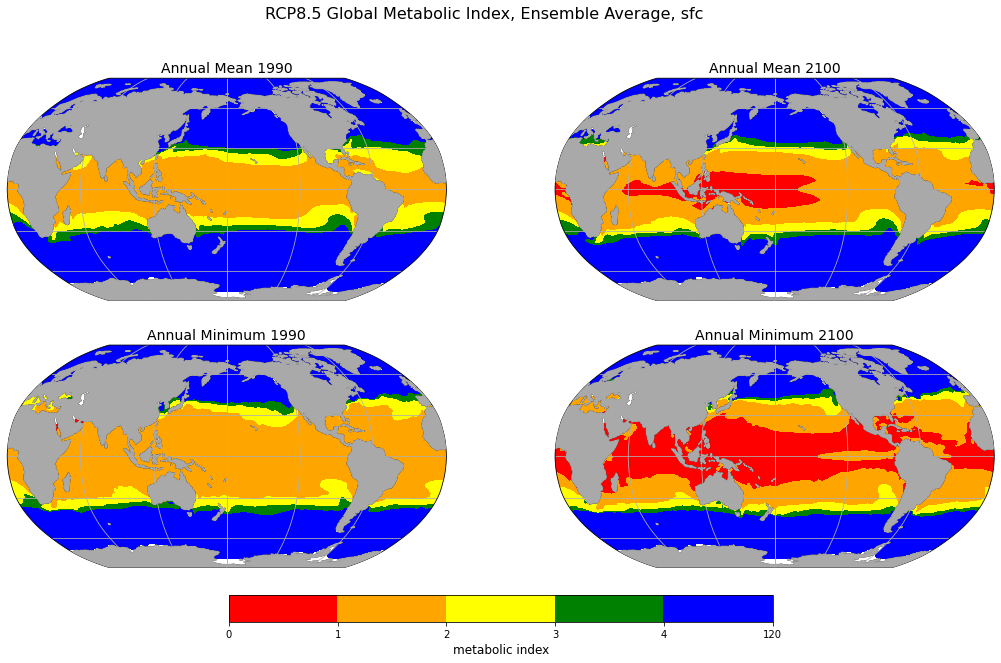

In [124]:
# map of sfc ensemble minimum
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Minimum, sfc', fontsize=16) # Specify a figure title
graph(ds_sfcMinMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_sfcMinMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_sfcMinMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_sfcMinMin, 2100, axs[1,1], 'Annual Minimum ')

In [127]:
# irr 0.1 ensemble average
irravgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_irr_0.1Wm2_1x1_ensAvg_1950_2100.nc'
ds_irrAvg = xr.open_dataset(irravgpath).rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})
ds_irrAvgMean = ds_irrAvg.groupby('time.year').mean(dim='time')
ds_irrAvgMin = ds_irrAvg.groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [128]:
# irr 0.1 ensemble minimum
irrminpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_irr_0.1Wm2_1x1_ensMin_1950_2100.nc'
ds_irrMin = xr.open_dataset(irrminpath).rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})
ds_irrMinMean = ds_irrMin.groupby('time.year').mean(dim='time')
ds_irrMinMin = ds_irrMin.groupby('time.year').min(dim='time')

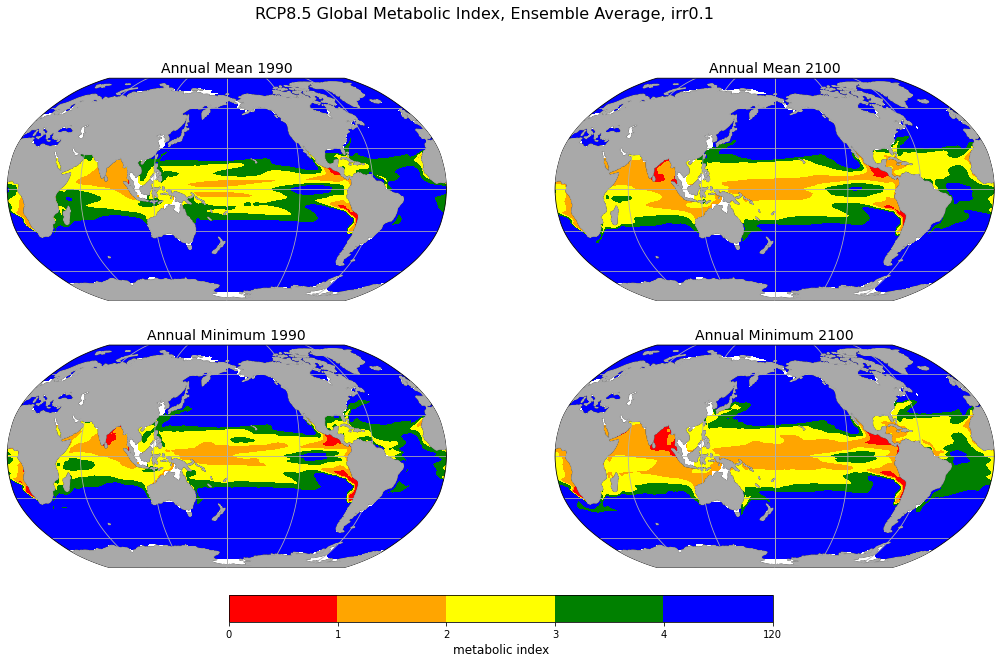

In [129]:
# map of irr0.1 ensemble average
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Average, irr 0.1', fontsize=16) # Specify a figure title
graph(ds_irrAvgMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_irrAvgMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_irrAvgMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_irrAvgMin, 2100, axs[1,1], 'Annual Minimum ')

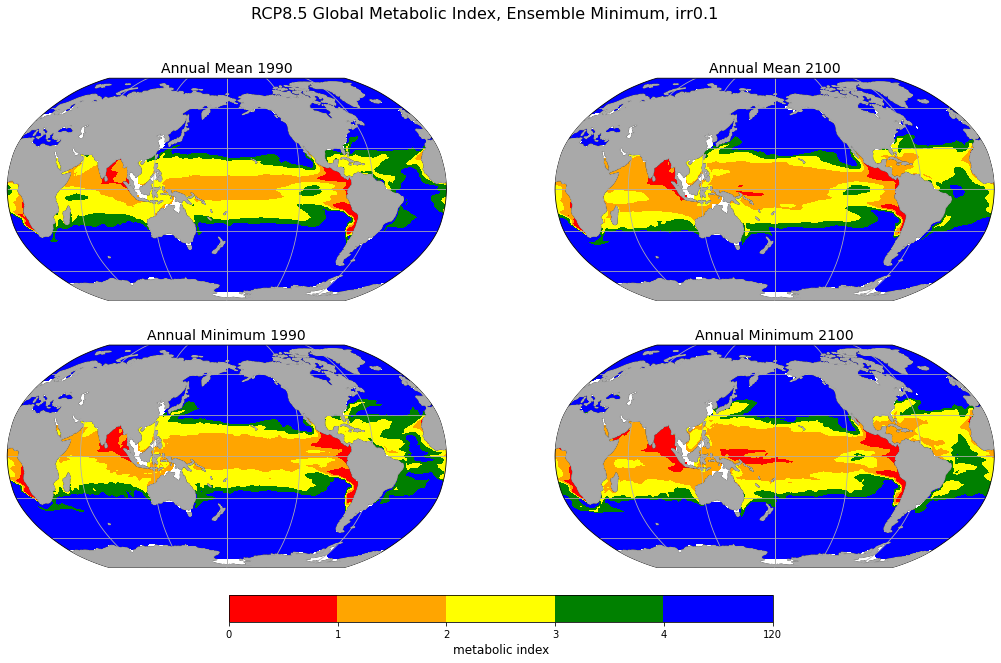

In [130]:
# map of irr0.1 ensemble minimum
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Minimum, irr 0.1', fontsize=16) # Specify a figure title
graph(ds_irrMinMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_irrMinMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_irrMinMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_irrMinMin, 2100, axs[1,1], 'Annual Minimum ')

In [132]:
# k11 ensemble average
k11avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ensAvg_1x1_1950_2100.nc'
ds_k11Avg = xr.open_dataset(k11avgpath)
ds_k11AvgMean = ds_k11Avg.groupby('time.year').mean(dim='time')
ds_k11AvgMin = ds_k11Avg.groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [133]:
# k11 ensemble minimum
k11minpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ensMin_1x1_1950_2100.nc'
ds_k11Min = xr.open_dataset(k11minpath)
ds_k11MinMean = ds_k11Min.groupby('time.year').mean(dim='time')
ds_k11MinMin = ds_k11Min.groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


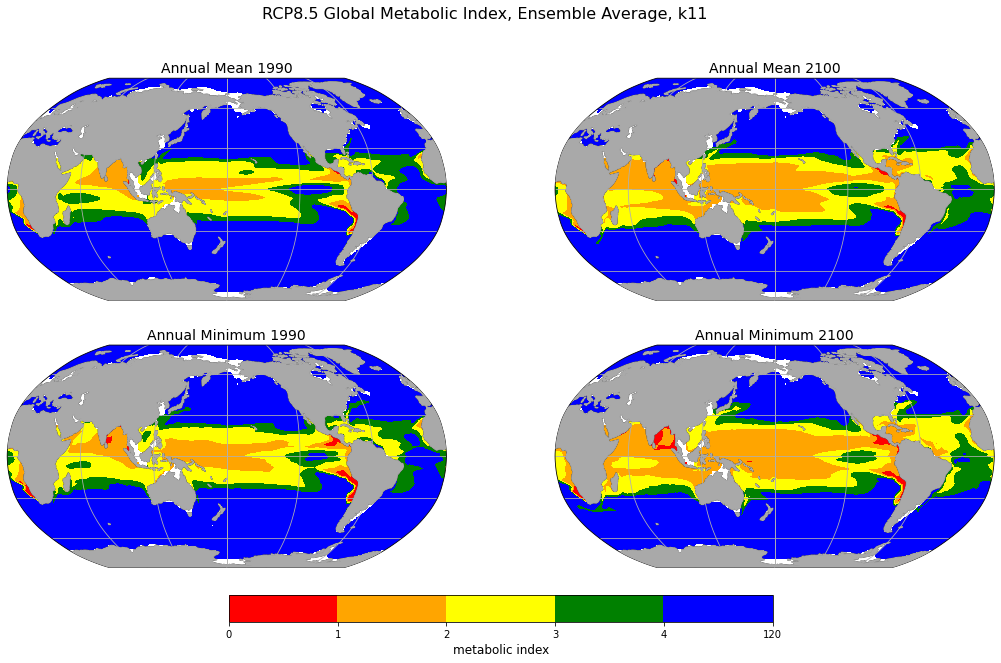

In [134]:
# map of k11 ensemble average
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Average, k11', fontsize=16) # Specify a figure title
graph(ds_k11AvgMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_k11AvgMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_k11AvgMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_k11AvgMin, 2100, axs[1,1], 'Annual Minimum ')

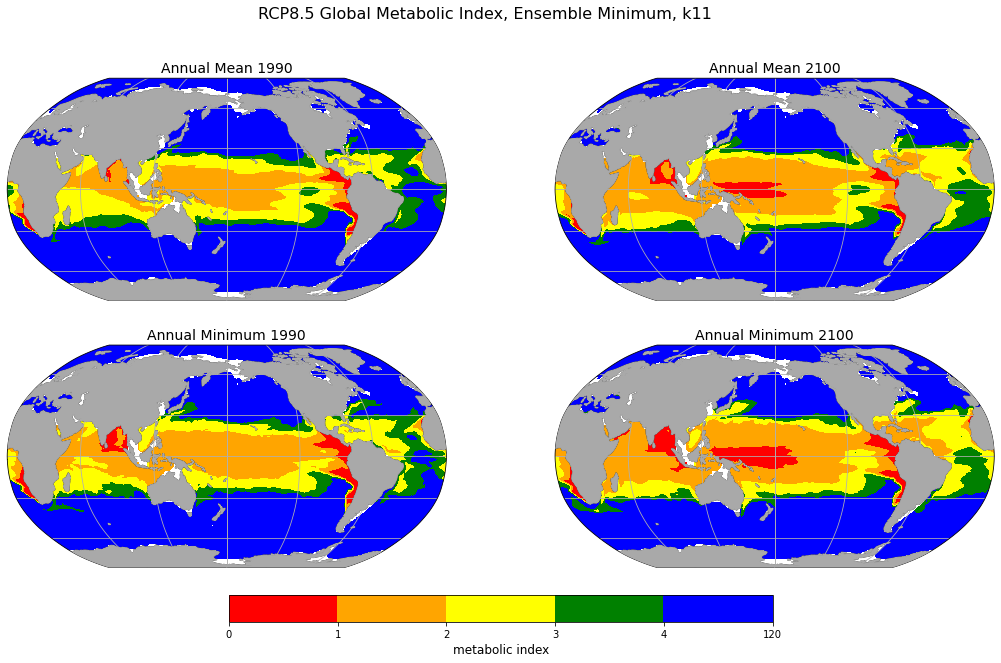

In [135]:
# map of k11 ensemble minimum
fig, axs = plt.subplots(figsize=(18,10),nrows=2,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index, Ensemble Minimum, k11', fontsize=16) # Specify a figure title
graph(ds_k11MinMean, 1990, axs[0,0], 'Annual Mean ')
graph(ds_k11MinMean, 2100, axs[0,1], 'Annual Mean ')
graph(ds_k11MinMin, 1990, axs[1,0], 'Annual Minimum ')
graph(ds_k11MinMin, 2100, axs[1,1], 'Annual Minimum ')